# QS4 Rotation-Vibration Spectrum of CO

## Importing data
Download your data from Moodle and import it as well as the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.optimize as opt 
import numpy as np

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Import data
data = pd.read_csv('CO.CSV', header=None)

Plot the experimental spectrum. Concentrate on the structure in the 2150 cm$^{−1}$ region of the spectrum (zoom in using `xmin` and `xmax`).

In [2]:
xmin = 2030 
xmax = 2240
ymin = 0.0
ymax = 0.4

## Pick the Peaks

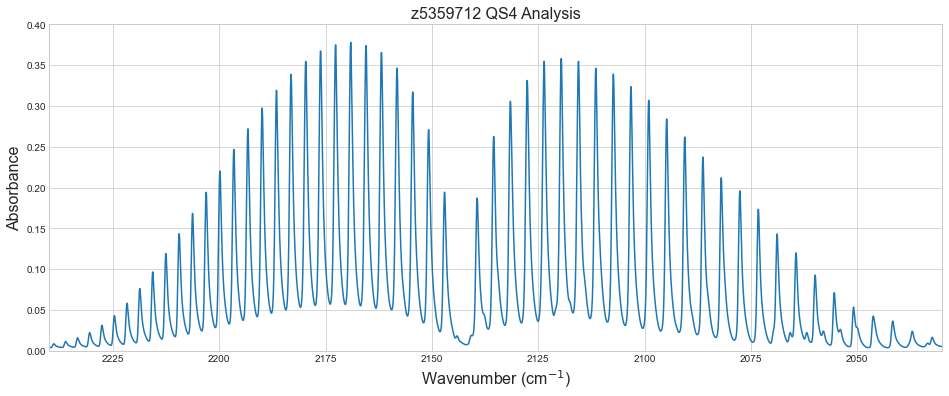

In [3]:
# Plot data
xdata = data[0]
ydata = data[1]

fig = plt.figure(figsize=(16,6))
plt.plot(xdata,ydata)

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.title("z5359712 QS4 Analysis", size=16)
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)
plt.show()

Use the code below to pick the peak positions by adjusting the **`prominence`** and **`distance`** parameters within the [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function. Make sure that as many peaks have been picked as possible. Extra peaks or false peaks do not matter at this stage.

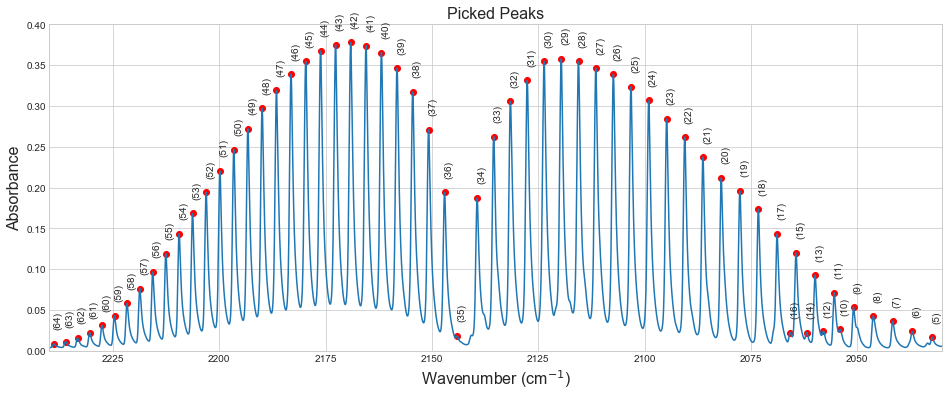

In [4]:
peaks = sg.find_peaks(ydata, prominence=0.002, distance=None, height=None) # Adjust the parameters

fig = plt.figure(figsize=(16,6))
plt.plot(xdata[peaks[0]],ydata[peaks[0]],"ro")
plt.plot(xdata,ydata)

plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

# Labelling the picked peaks
for i in range(len(peaks[0])):
    if xdata[peaks[0][i]] > xmin and xdata[peaks[0][i]] < xmax:
        stri = '({})'.format(i)
        plt.text(xdata[peaks[0][i]],ydata[peaks[0][i]]+0.02,stri,rotation=90)

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.title("Picked Peaks", size=16)
plt.show()

## Assign R branch
To aid your analysis, the first line in the R-branch should be located near 2147 cm$^{−1}$. *Ensure the peaks are numbered from the middle **outwards**.*

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]


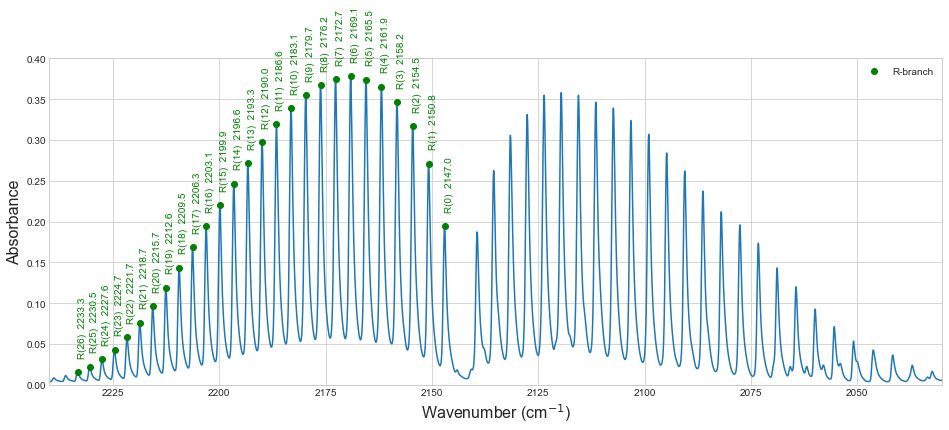

In [5]:
######### Choose the indices of the peaks associated with the R-branch. R(0) is at 2147 cm-1
R = [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]         # Complete the list of indices AND label from the middle outwards)
print(R)

offsetR =0         # Update the offset to assign the lower quantum number, J"
#########

### Creating the figure
fig= plt.figure(figsize=(16,6))
plt.plot(xdata,ydata)

plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

### Empty arrays where the assigned wavenumber and quantum number will be stored
R_x = np.array([],dtype=np.float64)
R_y = np.array([],dtype=np.float64)
JR = np.array([],dtype=np.int64)

### Assigning and labelling peaks
for i in range(len(R)):
    R_x = np.append(R_x,xdata[peaks[0][R[i]]])
    R_y = np.append(R_y,ydata[peaks[0][R[i]]])
    JR = np.append(JR,i + offsetR) 
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+.02,stri,rotation=90,color='g')

### Plot
plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

## Assign P branch
Repeat for the P branch. *Ensure the peaks are numbered from the middle **outwards**.*

[34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 15, 13, 11, 9, 8, 7, 6, 5]


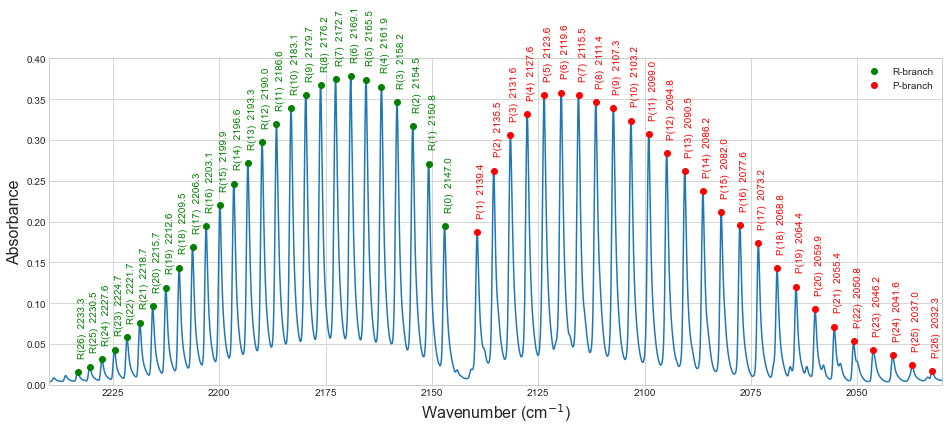

In [6]:
######### Choose the indices of the peaks associated with the P-branch.
P = [34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 15, 13, 11, 9, 8, 7, 6, 5]          # Complete the list of indices AND label from the middle outwards
offsetP = 1    # Update the offset to assign the lower quantum number, J"
#########

print(P)

fig= plt.figure(figsize=(16,6))
plt.plot(xdata,ydata)

plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

P_x = np.array([],dtype=np.float64)
P_y = np.array([],dtype=np.float64)
JP = np.array([],dtype=np.int64)

for i in range(len(P)):
    P_x = np.append(P_x,xdata[peaks[0][P[i]]])
    P_y = np.append(P_y,ydata[peaks[0][P[i]]])
    JP = np.append(JP,i + offsetP) 
    stri = 'P({})  {:.5}'.format(JP[i],P_x[i])
    plt.text(P_x[i],P_y[i]+0.02,stri,rotation=90,color='r')

for i in range(len(R)):
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+0.02,stri,rotation=90,color='g')


plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.plot(P_x,P_y,'ro',label= 'P-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

In [7]:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# for Palatino and other serif fonts use:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


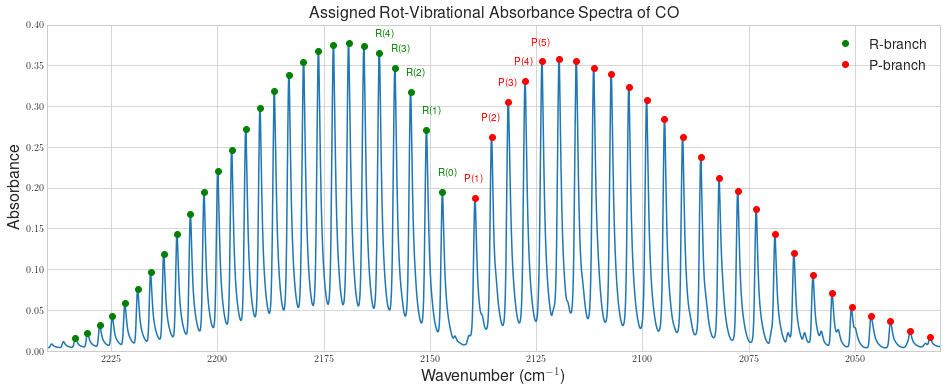

In [9]:
# Plotting te Formal Export Graph

fig= plt.figure(figsize=(16,6))
plt.plot(xdata,ydata)

plt.xlim(xmax,xmin)
plt.ylim(ymin,0.40)

P_x = np.array([],dtype=np.float64)
P_y = np.array([],dtype=np.float64)
JP = np.array([],dtype=np.int64)

for i in range(len(P)):
    P_x = np.append(P_x,xdata[peaks[0][P[i]]])
    P_y = np.append(P_y,ydata[peaks[0][P[i]]])
    JP = np.append(JP,i + offsetP) 
    stri = 'P({})'.format(JP[i],P_x[i])
    
    if i < 5:
        plt.text(P_x[i]+2.5,P_y[i]+0.02,stri,color='r')
    #plt.text(P_x[i],P_y[i]+0.02,stri,rotation=90,color='r')

for i in range(5):
    stri = 'R({})'.format(JR[i],R_x[i])
    plt.text(R_x[i]+1,R_y[i]+0.02,stri,color='g')


plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.plot(P_x,P_y,'ro',label= 'P-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend(prop={'size': 14})
plt.title('Assigned Rot-Vibrational Absorbance Spectra of CO', size=16)
#plt.savefig('FormalExport.eps', transparent=True, bbox_inches="tight")
plt.show()

Store the picked wavenumbers (cm$^{-1}$) in the array `energy` using the code below. Create a new quantum number $x$, which will allow both sets of data to be plotted together on the same curve. Is it smooth?

In [10]:
### Empty arrays
energy = np.array([],dtype=np.float64)
x = np.array([],dtype=np.int64)

### Assigning quantum number x to plot together on same curve
for i in range(len(JR)):
    x = np.append(x,JR[i]+1)     # J" + 1, see Equation 12
    energy = np.append(energy,R_x[i])

for i in range(len(JP)):
    x = np.append(x,-JP[i])      # = -J", see Equation 12
    energy = np.append(energy,P_x[i])

*Note: The branch positions have switched, so P is bottom left and R is top right (in line with increasing energy).*

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


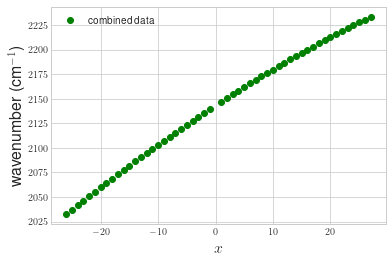

In [11]:
plt.plot(x,energy,'go',label='combined data')
plt.xlabel('$x$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

Fit the wavenumbers and energy to determine $\omega$, $B_1$ and $B_0$, then $B_e$:

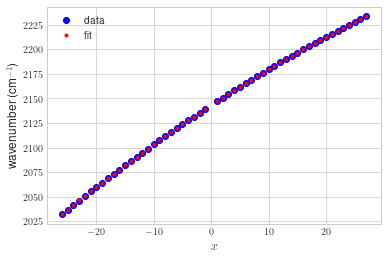

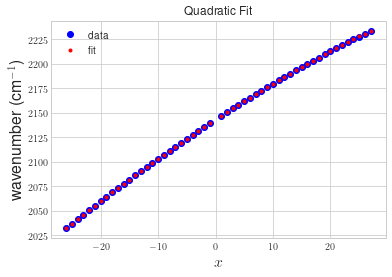

In [12]:
### Fit a function:
### ----------------
### Note: To use the extra terms in the fit you will need to 
### add 'd' and 'e' as a parameter when defining the function

def func(x,a,b,c, d):
    return a*x**2 + b*x + c + d*x**3

optP, pcov = opt.curve_fit(func,x, energy)

plt.plot(x,energy,'bo', label='data')
plt.plot(x,func(x,*optP),'r.',label='fit')

plt.xlabel('$x$',size=12)
plt.ylabel('wavenumber (cm$^{-1}$)',size=12)
plt.legend()
#plt.title('Cubic Fit', size=14)
#plt.savefig('CubeFit.eps', transparent=True, bbox_inches="tight")
plt.show()


def func1(x,a,b,c):
    return a*x**2 + b*x + c

optP1, pcov1 = opt.curve_fit(func1,x, energy)

plt.plot(x,energy,'bo', label='data')
plt.plot(x,func1(x,*optP1),'r.',label='fit')

plt.xlabel('$x$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.title('Quadratic Fit')
#plt.savefig('QuadFit.eps', transparent=True)
plt.show()

In [16]:
# Sums of Residuals

res_cubic = energy - func(x, *optP)
ss_r_cubic = np.sum(res_cubic**2)

res_quad = energy - func1(x, *optP1)
ss_r_quad = np.sum(res_quad**2)

print('Residual sum of Squres Cubic = ', ss_r_cubic, '   Residual sum of Squres Quadratic = ', ss_r_quad)

Residual sum of Squres Cubic =  0.029109918597047087    Residual sum of Squres Quadratic =  0.3024971644018096


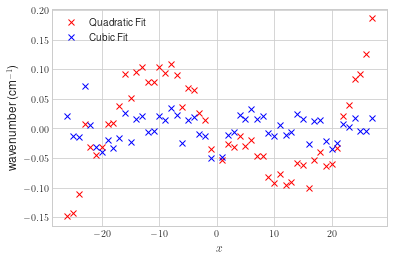

In [15]:
# Quadratic vs Cubic Plot Comparrison
plt.plot(x,func1(x,*optP1) - energy,'rx',label='Quadratic Fit')
plt.plot(x,func(x,*optP) - energy,'bx',label='Cubic Fit')

#plt.plot(x,res_quad,'rx',label='Quadratic Fit')
#plt.plot(x,res_cubic,'bx',label='Cubic Fit')

plt.xlabel('$x$',size=12)
plt.ylabel('wavenumber (cm$^{-1}$)',size=12)
plt.legend()
#plt.title('Plot of Risiduals', size=14)
#plt.savefig('Residuals.eps', transparent=True, bbox_inches="tight")
plt.show()

In [17]:
B0 = (optP[1]-optP[0])/2
B1 = (optP[1]+optP[0])/2
w = optP[2]

Be = B0 - 0.5*(B1-B0)

print('B1 = ',B1,' cm-1')
print('B0 = ',B0,' cm-1')
print('Be = ',Be,' cm-1')
print('w = ',w,' cm-1')

B1 =  1.9050343835888588  cm-1
B0 =  1.9224483909607588  cm-1
Be =  1.9311553946467088  cm-1
w =  2143.187397831647  cm-1


In [18]:
err_a = 2*pcov[0][0]**0.5
err_b = 2*pcov[1][1]**0.5

err_B0 = (err_a**2+err_b**2)**0.5
err_Be = (err_B0**2+(0.5*err_a)**2)**0.5

err_w = 2*pcov[2][2]**0.5

print('Be = ',Be,'+/-',err_Be,' cm-1')

print('err \omega = ',err_w,' cm-1')

print('Error B1 and B2 = ',err_B0,' cm-1')

Be =  1.9311553946467088 +/- 0.0010648450026333588  cm-1
err \omega =  0.010176707943986547  cm-1
Error B1 and B2 =  0.001064731454091738  cm-1


The literature value is $B_e$ = 1.93128087 cm$^{-1}$. Estimate errors in your numbers, if out... try adding a cubic term to the fit! This will account for higher order terms not present in the rigid rotor model, such as centrifugal distortion.

Now calculate $r_e$ and $\alpha_e$, referring to equations in the Introduction:

$$B_0 = B_e - \alpha_e \left( 0.5 \right)$$

$$\therefore \alpha_{e} = 2 \left( B_{e}- B_{0} \right)$$

Error will be absolute error added in quadrature, i.e.,

$$ u \left( \alpha_e \right) = \sqrt{ u \left( B_e \right) ^2 + u \left( B_0 \right) ^2 } $$


In [19]:
alpha_e = 2*(Be-B0)

err_ae = ( err_Be**2 + err_B0**2 )**0.5

print('alpha_e = ',alpha_e,' +/- ',err_ae,'cm-1')

alpha_e =  0.01741400737190002  +/-  0.0015058379557460837 cm-1


From Mathematica, $r_e = 1.1295 \AA$

Solve[Quantity[1.93036415104197, 1/("Centimeters")] == 
  Quantity[1, 
    "PlanckConstant"]/(8*Quantity[6.8605`, "AtomicMassUnit"]*
     Quantity[1, "SpeedOfLight"]*(\[Pi]^2)*(R^2)), R]

Same percentage error of B_e

In [20]:
re = 1.12952638949

err_re = (err_Be/Be)*re

print('re = ',re,'+/-',err_re,' cm-1')

re =  1.12952638949 +/- 0.0006228243125980888  cm-1


Finally, calculate the expected frequency of a pure rotational 1-0 emission. Research how this frequency is used in astronomy - why is it important?

In [21]:
c = 2.99792458e10 #speed of light in cm
emission = 2*B0*c
print('emission is expected at ',emission,'+/-',2*err_B0*c,'Hz')
print('emission is expected at ',emission/1e9,'+/-',2*err_B0*c/1e9,'GHz')

emission is expected at  115267105700.85417 +/- 63839691.94641525 Hz
emission is expected at  115.26710570085417 +/- 0.06383969194641526 GHz


## Intensities and Temperature
The intensity of the R-branch can be crudely modelled by weighting the degeneracy of the $J$-level, $2J+1$, and a Boltzmann term, $\exp(-E(J)/k_BT)$, where $E(J)=B_0J(J+1)$. In the code below, adjust $k_BT$ in cm$^{-1}$ to match the maximum $J$ of your experimental data. Convert $k_BT$ to Kelvin. Is it reasonable?

189.99999999999733 Temperature is  288.9874598774844 K, =  15.837459877484434  C


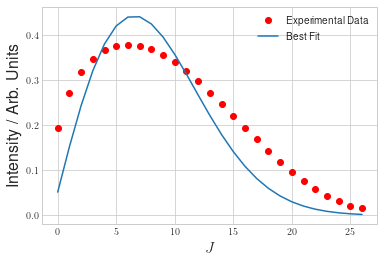

In [65]:
def boltz(JR, kT, factor):

    return factor*(2*JR +1)*np.exp(-B0*JR*(JR+1)/kT) 

optP, pcov = opt.curve_fit(boltz,JR, R_y, bounds=([130,-np.inf], [190,np.inf]), p0=[170,0.054])

plt.xlabel('$J$',size=16)
plt.ylabel('Intensity / Arb. Units',size=16)
plt.plot(JR,R_y,"ro", label='Experimental Data')

plt.plot(JR, boltz(JR, *optP), label='Best Fit')

Kelvincm = 2.9979e10*6.626e-34/1.306e-23 # c*h/k_B
kT = optP[0]

plt.legend()

print(kT, 'Temperature is ',kT*Kelvincm, 'K, = ',kT*Kelvincm-273.15, ' C')

plt.savefig('Thermal.eps', transparent=True, bbox_inches="tight")